In [2]:
import sys

from math import *;

sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy')  
sys.path.append('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims')
sys.path.append('C:\\Users\\Vandiver\\Documents\\HiFU\\code\\BioHeatCpp\\PBHEswig\\x64')

import numpy as np
import geom
import sonalleve
import transducers
import PBHEswig 
import argparse
import ablation_utils

import matplotlib.image as image
import matplotlib.pyplot as plt

import HookJeeves

os.chdir('C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\path_optimization\\')

%matplotlib inline

def getTraj(vec):
    return contstruct_circ_sonication_points(maxR_mm,turnspace_mm,140.,vec[0],vec[1],wait)
def plotTraj(vec):
    points,nt,numSon = contstruct_circ_sonication_points(maxR_mm,turnspace_mm,140.,vec[0],vec[1],vec[2])
    plt.plot(points[:,0], points[:,1], '*-')
    return points


In [437]:
import importlib
importlib.reload(transducers)

<module 'transducers' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\myPy\\transducers.py'>

In [75]:
del sys.modules['PBHE_CUDA']
del PBHE_CUDA

In [13]:
run CirclePathOptimization2.py -gpu -XR 4.0 -YR 4.0 -Nx 60 -Ny 60 -Nz 60 -w 2.0 -speed 0.3 -a 5.0 -I 1000

Proceeding with simulation...


In [7]:
type(np.complex)

type

In [19]:
(np.float64(1)*1j).real

0.0

In [24]:
qq=np.arange(0,4)*1j
pp=np.zeros(2,dtype=type(qq[0]))
type(pp[0])

numpy.complex128

In [ ]:
VolumeObjective_2(x0,verbose=True)

In [15]:
points,ntrn,nspt= getTraj(x0)

In [ ]:
speeds = np.arange(0.3,1.2, 0.1)

In [ ]:
roiExtra = np.logical_and( np.sqrt(gxp**2 + gyp**2) <= (1e-3*1.5*maxR_mm), np.abs(gzp-0.14) <= 0.015 )

In [ ]:
ObjectiveFunc(x0,show=True)

In [ ]:
numTargetVox = np.sum(roiOnTarget)
def func2(param_vec, verbose=False, show=False ):
    run_simulation( param_vec, verbose=verbose, show=show)
    value = ( np.sum(CEM[roiExtra] >= 240.0) - numTargetVox )**2
    print (param_vec, " -> ", value)
    return value

In [ ]:
v1 = [1,2,3,4]
v2 = [1,2,3]
v3 = [1,2]

g1,g2,g3 = np.meshgrid(v1,v2,v3,indexing='ij')


In [ ]:
mm=list( map( lambda x,y,z: ("{%d, %d, %d}" % (x,y,z) ), g1.flatten(),g2.flatten(),g3.flatten())  )

In [ ]:
dat=np.reshape( mm, [len(v1), len(v2), len(v3)] )

In [ ]:
dat[:,:,0]

In [21]:
x0

array([  3.00000000e-01,   5.00000000e+00,   1.00000000e+07])

In [3]:
speeds = np.arange(0.1, 1.0, 0.1)
dwells = np.arange(3, 15, 1.0)
waits = np.arange(1.0,10.0, 1.0)
Is = np.arange(1000.0, 3000.0, 250)*1e4

e0,e1,e2 = np.meshgrid(speeds,dwells,waits,indexing='ij')

nsims_to_run = np.product(e0.shape)

In [ ]:
Fgrid = list( map( lambda sp,dw,wt: VolumeObjective_2(np.array([sp,dw,wt,2000.0]) ) , e0.flatten(), e1.flatten(), e2.flatten() )  )

In [ ]:
Fdat=np.reshape( Fgrid, [len(speeds), len(dwells), len(waits)] )

In [ ]:
np.min(Fdat)

In [4]:
FvsV = list( map( lambda sp: VolumeObjective_2(np.array([sp, 4.75, 1500.0e4]) ) , speeds )  )

[  1.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  27008809
[  2.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  4251844
[  3.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9778129
[  4.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  5.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  6.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  7.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  8.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900
[  9.00000000e-01   4.75000000e+00   1.50000000e+07]  ->  9796900


In [5]:
FvsDw = list( map( lambda dw: VolumeObjective_2([0.3, dw, 1500.0e4] ) , dwells )  )

[0.3, 3.0, 15000000.0]  ->  9796900
[0.3, 4.0, 15000000.0]  ->  9796900
[0.3, 5.0, 15000000.0]  ->  9784384
[0.3, 6.0, 15000000.0]  ->  9734400
[0.3, 7.0, 15000000.0]  ->  9703225
[0.3, 8.0, 15000000.0]  ->  9696996
[0.3, 9.0, 15000000.0]  ->  9622404
[0.3, 10.0, 15000000.0]  ->  9616201
[0.3, 11.0, 15000000.0]  ->  9597604
[0.3, 12.0, 15000000.0]  ->  9672100
[0.3, 13.0, 15000000.0]  ->  9523396
[0.3, 14.0, 15000000.0]  ->  9603801


In [ ]:
VolumeObjective_2([0.3, 1.0, 1500e4] )

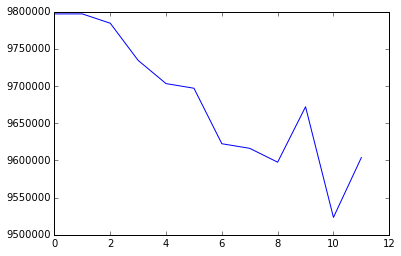

In [6]:
plt.plot(FvsDw)

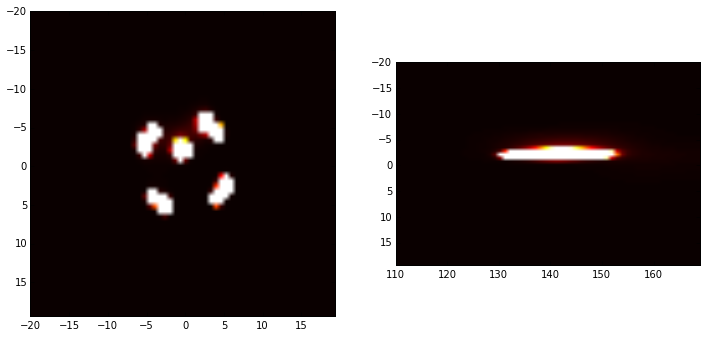

In [174]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(CEM[:,:,focplaneZpix],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*xrp[0], 1e3*xrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])
#plotTraj(x0[0:3])
plt.subplot(122)
plt.imshow(CEM[:,floor(Ny/2),:],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]])

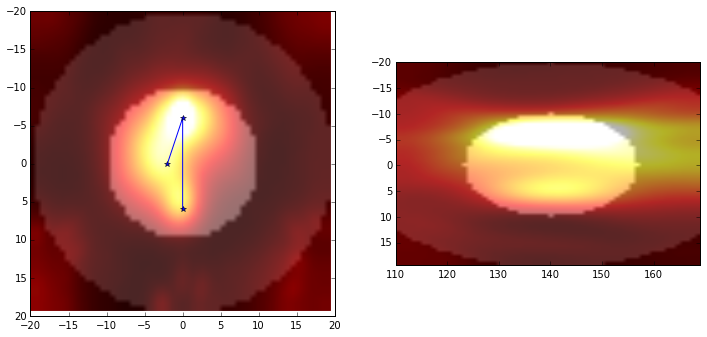

In [396]:
plt.figure(figsize=(12,9))
plt.subplot(121)
extXY=[1000*yrp[0],1000*yrp[-1],1000*xrp[-1],1000*xrp[0]]
plt.imshow((T[0][:,:,focplaneZpix]), extent=extXY, alpha=1.0,vmin=37,vmax=60, cmap=plt.cm.hot  )
plt.imshow((roiOnTarget[:,:,focplaneZpix]), extent=extXY, alpha=0.35,vmin=0,vmax=1, cmap=plt.cm.gray  )
plt.imshow((roiExtra[:,:,focplaneZpix]), extent=extXY, alpha=0.15,vmin=0,vmax=1, cmap=plt.cm.gray  )

#plt.plot(points[:,0], points[:,1], '-*b')
plotTraj(xc)
plt.subplot(122)
extXZ=[1000*zrp[0],1000*zrp[-1],1000*xrp[-1],1000*xrp[0]]
plt.imshow((T[0][:,floor(Ny/2),:]),extent=extXZ, alpha=1.0,vmin=37,vmax=60, cmap=plt.cm.hot  )
plt.imshow((roiOnTarget[:,floor(Ny/2),:]),extent=extXZ, alpha=0.35,vmin=0,vmax=1, cmap=plt.cm.gray  )
plt.imshow((roiExtra[:,floor(Ny/2),:]),extent=extXZ, alpha=0.15,vmin=0,vmax=1, cmap=plt.cm.gray  )

In [16]:
run CirclePathOptimization4.py -gpu -XR 4.0 -YR 4.0 -Nt 30 -Nx 61 -Ny 61 -Nz 61 -w 2.0 -d 2.25 -speed 2.0 -a 2.0 -I 2500 -nfoc 5

usage: CirclePathOptimization4.py [-h] [-o O] [-maxR MAXR] [-DR DR]
                                  [-nfoc NFOC] [-I I] [-d D] [-a A] [-w W]
                                  [-speed SPEED] [-alpha ALPHA] [-perf PERF]
                                  [-fix] [-XR XR] [-YR YR] [-ZR ZR] [-Z0 Z0]
                                  [-Nx NX] [-Ny NY] [-Nz NZ] [-Nt NT] [-gpu]

optional arguments:
  -h, --help    show this help message and exit
  -o O          Output h5 file
  -maxR MAXR    Max trajectory radius (cm), default = 1.000000
  -DR DR        Turn spacing (cm). Default = 0.400000
  -nfoc NFOC    # focal points (1 for single focus)
  -I I          Peak intensity (Ispta) of the acoustic field in W/cm^2.
                Default = 1000.000000 W/cm^2
  -d D          Diameter of focal ring (mm)
  -a A          Dwell seconds (aka heating time per position), default =
                5.000000
  -w W          Wait time, default = 2.000000
  -speed SPEED  Average speed (mm per sec), default 

In [4]:
PBHE_CUDA.Create_Global_GPU_Session32(*T.shape)

In [4]:
PBHE_CUDA.ResetGPU()

In [35]:
speeds = np.arange(0.3, 2.0, 0.1)
dwells = np.arange(3, 10.0, 0.5)
waits = np.arange(2.0,6.0, 2.0)
waits=[2.0]
#Is = np.arange(1000.0, 3000.0, 250)*1e4
Is = [2.5e7]
Npass=1

e0,e1,e2,e3 = np.meshgrid(speeds,dwells,waits,Is,indexing='ij')

nsims_to_run = np.product(e0.shape)
nsims_to_run

238

In [18]:
2.5e7/np.max(I0)

109726450986934.19

In [6]:
ablation_utils.trajTotalTime(10,4,140,2.0,2.0,2.0)

46.0

In [7]:
VolumeObjective_4([2.0, 2.0, 1.0, 2.5e7], Npass=1)

[2.0, 2.0, 1.0, 25000000.0]  ->  251666496


251666496

In [7]:
VolumeTempObjective_4([paramsFgrid[1]], Npass=Npass)

[  6.00000000e-01   2.50000000e+00   2.00000000e+00   2.50000000e+07]  ->  80496784 9.59476852417 5.64786529541


(80496784, 9.5947685241699219, 5.6478652954101562)

In [36]:
paramsFgrid = list( map( lambda sp,dw,wt,I: (np.array([sp,dw,wt,I]) ) , e0.flatten(), e1.flatten(), e2.flatten(), e3.flatten() ))

In [342]:
simGridRet = list( map( lambda sp,dw,wt,I: VolumeTempObjective_4(np.array([sp,dw,wt,I]), Npass=Npass, subsampN=10  ) , e0.flatten(), e1.flatten(), e2.flatten(), e3.flatten() )  )

[  3.00000000e-01   3.00000000e+00   2.00000000e+00   2.50000000e+07]  ->  459073476 22.7699546814 9.67450714111
[  3.00000000e-01   3.50000000e+00   2.00000000e+00   2.50000000e+07]  ->  455694409 23.2523345947 9.72356796265
[  3.00000000e-01   4.00000000e+00   2.00000000e+00   2.50000000e+07]  ->  391011076 23.2168197632 9.5248298645
[  3.00000000e-01   4.50000000e+00   2.00000000e+00   2.50000000e+07]  ->  426216025 23.7615089417 9.69288253784
[  3.00000000e-01   5.00000000e+00   2.00000000e+00   2.50000000e+07]  ->  400120009 23.8309936523 9.6164932251
[  3.00000000e-01   5.50000000e+00   2.00000000e+00   2.50000000e+07]  ->  477247716 24.624874115 9.94118881226
[  3.00000000e-01   6.00000000e+00   2.00000000e+00   2.50000000e+07]  ->  438274225 24.5178337097 9.80564117432
[  3.00000000e-01   6.50000000e+00   2.00000000e+00   2.50000000e+07]  ->  357474649 24.0282936096 9.48545455933
[  3.00000000e-01   7.00000000e+00   2.00000000e+00   2.50000000e+07]  ->  433264225 24.7674789429 

In [343]:
Fgrid = list(map( lambda x: x[0], simGridRet))

In [37]:
trajTimes = np.reshape( list(map( lambda x: ablation_utils.trajTotalTime(maxR_mm,turnspace_mm,0,x[0],x[1],x[2]), paramsFgrid)), e0.shape )
numSons = np.reshape( list(map( lambda x: ablation_utils.countSonications(maxR_mm,turnspace_mm,0,x[0],x[1],x[2]), paramsFgrid)), e0.shape )


In [345]:
OnOffRatio = np.reshape( list(map( lambda x: x[1]/x[2], simGridRet)), e0.shape )
OnRate = np.reshape( list(map( lambda x: x[1], simGridRet)), e0.shape )

In [346]:
Fdat=np.reshape( Fgrid, e0.shape )

In [364]:
rowLoc

array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9])

In [39]:

rowLoc = speeds
colLoc = dwells
rowInc =rowLoc[1]-rowLoc[0]
colInc =colLoc[1]-colLoc[0]
extent=[  colLoc[0],  colLoc[-1] + colInc, rowLoc[-1]+rowInc, rowLoc[0]]


rowTickLocs = range(0,len(rowLoc),1)
rowTickLabs = list(map(lambda d:"%0.1f" % d,rowLoc[rowTickLocs]))
colTickLocs = range(0,len(colLoc),2)
colTickLabs = list(map(lambda d:"%0.1f" % d,colLoc[colTickLocs]))

fig=plt.figure(figsize=(16,5.5))

volObj = ( np.double(np.max(Fdat) - Fdat[:,:,0,0]) )

ax1 = plt.subplot2grid((1,4), (0, 0))
im1=ax1.imshow((volObj), interpolation='none')
ax1.set_title('CEM Vol_obj')
plt.colorbar(orientation='vertical',mappable=im1)


ax2 = plt.subplot2grid((1,4), (0, 1) )
ax2.set_title('On/Off Temp')
im2=ax2.imshow((OnOffRatio[:,:,0,0]), interpolation='none')
plt.colorbar(orientation='vertical',mappable=im2)

ax3 = plt.subplot2grid((1,4), (0, 2) )
ax3.set_title('On Temp-rate')
im3=ax3.imshow(( OnRate[:,:,0,0]  /trajTimes[:,:,0,0]), interpolation='none')
plt.colorbar(orientation='vertical',mappable=im3)

def multiObj(volObj, OnRate, OnOffRatio):
    return OnRate * OnOffRatio* ( volObj/ (np.max(volObj) - np.min(volObj)) )

def multiObj2(volObj, OnRate, OnOffRatio, w=[1,1,1]):
    r1 = np.max(volObj) - np.min(volObj)
    r2 = np.max(OnRate) - np.min(OnRate)
    r3 = np.max(OnOffRatio) - np.min(OnOffRatio)
    
    return volObj*w[0]/r1 + (OnRate - np.min(OnRate))* w[1] / r2  +  (OnOffRatio-np.min(OnOffRatio))* w[2] / r3

def multiObj3(volObj, OnRate, OnOffRatio):
    r1 = np.max(volObj) - np.min(volObj)
    r2 = np.max(OnRate) - np.min(OnRate)
    r3 = np.max(OnOffRatio) - np.min(OnOffRatio)
    
    return volObj*(OnRate - np.min(OnRate))*(OnOffRatio-np.min(OnOffRatio))/(r1*r2*r3)


ax4 = plt.subplot2grid((1,4), (0, 3) )
ax4.set_title('Coupled')
im4=ax4.imshow( multiObj3(volObj, OnRate[:,:,0,0] / trajTimes[:,:,0,0], OnOffRatio[:,:,0,0]  ) , interpolation='none')
plt.colorbar(orientation='vertical',mappable=im4)
#plt.colorbar(orientation='horizontal',mappable=im4)

for a in [ax1,ax2,ax3,ax4]:
    #a.xaxis.set_label('dwell')
    #a.yaxis.set_label('speed')
    a.set_xlabel('dwell',fontsize=14)
    a.set_ylabel('speed',fontsize=14)
    a.yaxis.set_ticks( rowTickLocs )
    a.yaxis.set_ticklabels( rowTickLabs )
    a.xaxis.set_ticks( colTickLocs )
    a.xaxis.set_ticklabels( colTickLabs )
    a.tick_params(labelsize=12)
    


NameError: name 'Fdat' is not defined

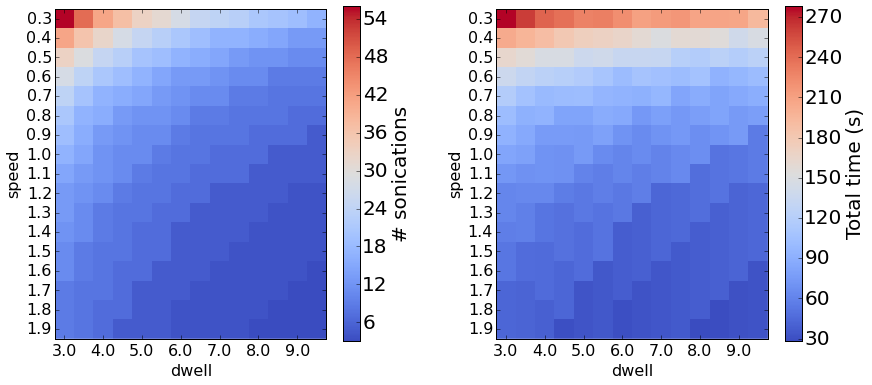

In [86]:
fig,ax = plt.subplots(nrows=1,ncols=2,gridspec_kw=dict(wspace=0.3),figsize=(14,6))
cmap=image.cm.coolwarm
imN=ax[0].imshow(numSons[:,:,0,0],interpolation='none',cmap=cmap)
cb=plt.colorbar(mappable=imN,ax=ax[0])
cb.ax.tick_params(labelsize=20)
cb.set_label('# sonications',fontsize=20)

imt=ax[1].imshow(trajTimes[:,:,0,0],interpolation='none',cmap=cmap)
cb=plt.colorbar(mappable=imt,ax=ax[1])
cb.ax.tick_params(labelsize=20)
cb.set_label(label='Total time (s)',fontsize=20)


for a in ax.flatten():
    a.set_xlabel('dwell',fontsize=16)
    a.set_ylabel('speed',fontsize=16)
    a.yaxis.set_ticks( rowTickLocs )
    a.yaxis.set_ticklabels( rowTickLabs )
    a.xaxis.set_ticks( colTickLocs )
    a.xaxis.set_ticklabels( colTickLabs )
    a.tick_params(labelsize=16)

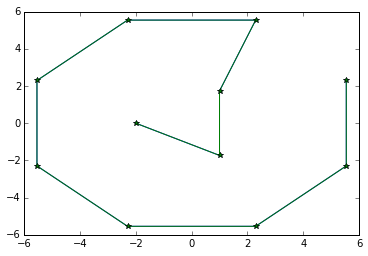

In [92]:
#plotTraj([0.6,4.5,2.0]);
plotTraj([0.5, 10.0,2.0]);
plotTraj([1.0, 5.0 ,2.0]);

In [94]:
f=1
ablation_utils.trajTotalTime(10, 4,0, 1.0, 5.0, 2.0)

75.0

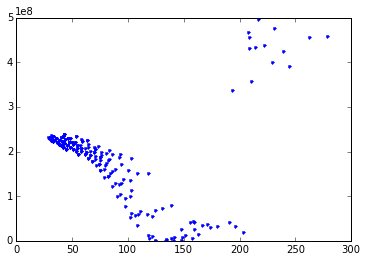

In [412]:
plt.plot( trajTimes.flatten(), Fdat.flatten(), '.' )

In [13]:
np.max(I0)

2.2783932019251135e-07

In [15]:
1/preNormI0max

4389058.039477367

In [5]:
xc=[1.2, 2.25, 2.0, 2.5e7]
VolumeTempObjective_4(xc,verbose=True,subsampN=10,Npass=1)

sonication 1 / 19
0%
sonication 2 / 19
0%
sonication 3 / 19
0%
sonication 4 / 19
0%
sonication 5 / 19
0%
sonication 6 / 19
0%
sonication 7 / 19
0%
sonication 8 / 19
0%
sonication 9 / 19
0%
sonication 10 / 19
0%
sonication 11 / 19
0%
sonication 12 / 19
0%
sonication 13 / 19
0%
sonication 14 / 19
0%
sonication 15 / 19
0%
sonication 16 / 19
0%
sonication 17 / 19
0%
sonication 18 / 19
0%
sonication 19 / 19
0%
[1.2, 2.25, 2.0, 25000000.0]  ->  203290564 10.6012878418 3.20422744751


(203290564, 10.601287841796875, 3.2042274475097656)

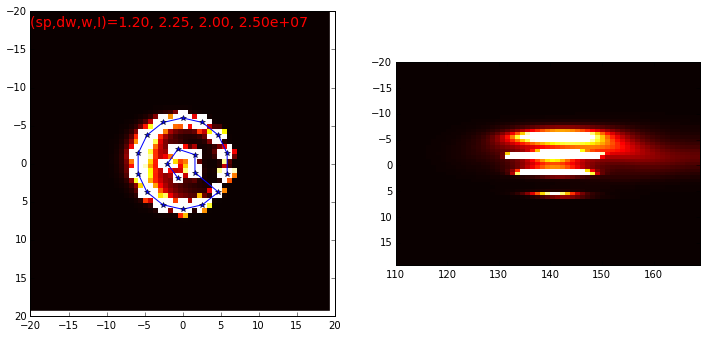

In [8]:
plt.figure(figsize=(12,9))
plt.subplot(121)
plt.imshow(np.transpose(CEM[:,:,focplaneZpix]),vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*yrp[0], 1e3*yrp[-1], 1e3*xrp[-1], 1e3*xrp[0]],interpolation='none')
#plt.plot(points[:,0], points[:,1], '-*b')
plt.text(xrp[0]*1000,-18,'(sp,dw,w,I)=%0.2f, %0.2f, %0.2f, %0.2e' % tuple(xc),fontdict=dict(color='red',fontsize=14)  )
plotTraj(xc)
plt.subplot(122)
plt.imshow(CEM[:,floor(Ny/2),:],vmin=0,vmax=240,cmap=plt.cm.hot, extent=[1e3*zrp[0], 1e3*zrp[-1], 1e3*yrp[-1], 1e3*yrp[0]],interpolation='none')

#### Save the simulation

In [97]:
import importlib
import h5py

In [107]:
importlib.reload(ablation_utils)

<module 'ablation_utils' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\ablation_utils.py'>

In [128]:
#define a new file
#filename='C:\\Users\\Vandiver\\Data\\simulations\\param_grid\\LargeCuda_Obj4_old.h5'

f =h5py.File(filename, "w")

ablation_utils.write_xyz_simulation_coords(f, gxp=gxp, gyp=gyp,gzp=gzp,xrp=xrp,yrp=yrp,zrp=zrp,roiON=roiOnTarget,roiOFF=roiOffTarget,roiEXTRA=roiExtra)

names=["speed", "dwell", "wait", "Ispta0"]
units=["mm/s", "sec", "sec", "W/m^2"]
ablation_utils.write_parameter_space(f,Fdat,paramsFgrid, names, units=units, scoringfunc='VolumeObjective_4')

f.close()

----

In [25]:
ii=np.argmin(Fdat)

(e0mi,e1mi,e2mi,e3mi)=np.unravel_index(ii,Fdat.shape)
minTuple=(e0mi,e1mi,e2mi,e3mi)
minVec = [e0[minTuple], e1[minTuple], e2[minTuple], e3[minTuple]]

Fmin=np.min(Fdat)
Fmax=np.max(Fdat)


In [124]:
f.close()

In [89]:
minVec

[0.20000000000000001, 3.0, 2.0, 17500000.0]

In [85]:
VolumeObjective_4(np.array(minVec) )

[  2.00000000e-01   6.00000000e+00   8.00000000e+00   2.00000000e+07]  ->  1849


1849

In [110]:
f =h5py.File(filename, "r")


In [113]:
f['param_grid'].attrs['Ndims']

4

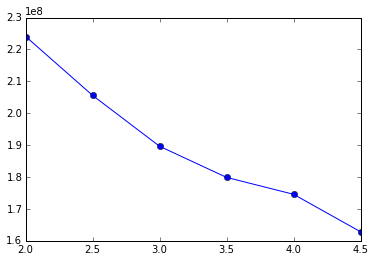

In [26]:
plt.plot(dwells, Fdat[0,:,:,0], '-o' )

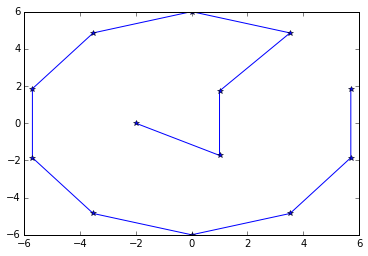

In [43]:
plotTraj(xc);

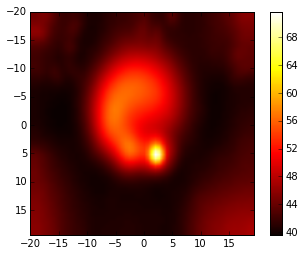

In [404]:
plt.imshow(T[0][:,:,focplaneZpix],cmap=plt.cm.hot,extent=1000*np.array([yrp[0],yrp[-1], xrp[-1],xrp[0]]))
#plotTraj(xc);
plt.colorbar()

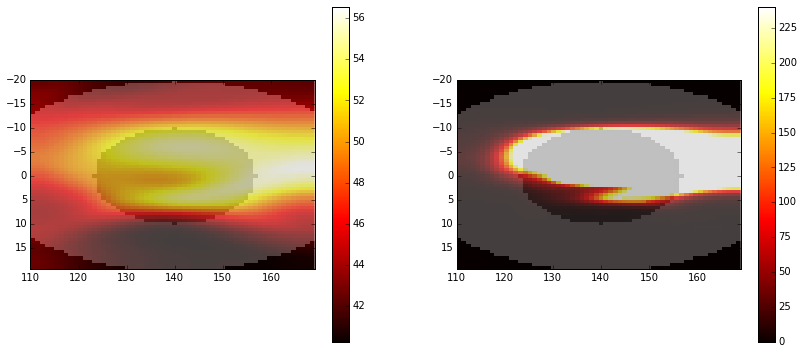

In [405]:
j=floor(Ny/2)
xz=1000*np.array([zrp[0],zrp[-1],xrp[-1],xrp[0]])

plt.figure(figsize=(14,6))

plt.subplot(121)
plt.imshow(T[0][:,j,:],cmap=plt.cm.hot , extent=xz, interpolation='none')
plt.colorbar()
plt.imshow( roiOnTarget[:,j,:] , extent=xz, vmin=0,vmax=1,cmap=image.cm.gray, alpha=0.15, interpolation='none')
plt.imshow( roiOffTarget[:,j,:] , extent=xz, vmin=0,vmax=1,cmap=image.cm.gray, alpha=0.25, interpolation='none')

plt.subplot(122)
plt.imshow(CEM[:,j,:],cmap=plt.cm.hot ,vmin=0,vmax=240, extent=xz, interpolation='none')
plt.colorbar()
plt.imshow( roiOnTarget[:,j,:] , extent=xz, vmin=0,vmax=1,cmap=image.cm.gray, alpha=0.15, interpolation='none')
plt.imshow( roiOffTarget[:,j,:] , extent=xz, vmin=0,vmax=1,cmap=image.cm.gray, alpha=0.25, interpolation='none')

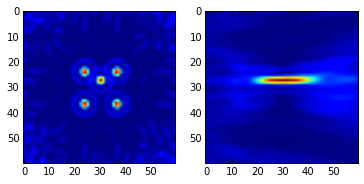

In [285]:
plt.subplot(121)
plt.imshow(Isum2[:,:,focplaneZpix])
plt.subplot(122)
plt.imshow(Isum2[:,floor(Ny/2),:])

In [87]:
Isum=ablation_utils.trajSumEnergy(xrp,yrp,zrp, 10.0, 4.0, 140.0, 0.6, 9, 2.0, L1renorm=sqrt(2.5e7/preNormI0max),unvecs=unvecs, pxyz=pxyz, use_gpu=True, verbose=True)

Pass 1/1, 100% 

In [88]:
Isum2=ablation_utils.trajSumEnergy(xrp,yrp,zrp, 10.0, 4.0, 140.0, 1.2, 9, 2.0, L1renorm=sqrt(2.5e7/preNormI0max),unvecs=unvecs, pxyz=pxyz, use_gpu=True, verbose=True)

Pass 1/1, 100% 

In [89]:
Isum3=ablation_utils.trajSumEnergy(xrp,yrp,zrp, 10.0, 4.0, 140.0, 1.9, 9, 2.0, L1renorm=sqrt(2.5e7/preNormI0max),unvecs=unvecs, pxyz=pxyz, use_gpu=True, verbose=True)

Pass 1/1, 100% 

In [419]:
importlib.reload(ablation_utils)

<module 'ablation_utils' from 'C:\\Users\\vchaplin\\Documents\\HiFU\\code\\AblationSims\\ablation_utils.py'>

(0, 1)

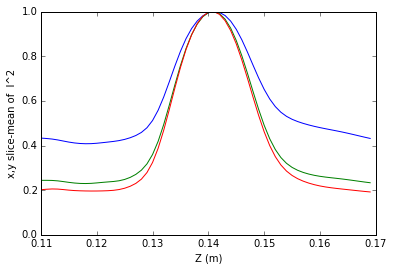

In [339]:
Isq=np.mean( (Isum)**2,axis=(0,1))
Isq2=np.mean( (Isum2)**2,axis=(0,1)) 
Isq3=np.mean( (Isum3)**2,axis=(0,1)) 
plt.plot(zrp, Isq / np.max(Isq) )
plt.plot(zrp, Isq2 / np.max(Isq2) )
plt.plot(zrp, Isq3 / np.max(Isq3) )
plt.xlabel('Z (m)')
plt.ylabel('x,y slice-mean of  I^2')
plt.ylim([0, 1])

In [ ]:
#ablation_utils.sonicate4D(simPhysGrid, [0.0], [1.0])